$$ \Large x_{n+1} = x_{n} - \gamma \nabla F(x) $$

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [15]:
def funtion(X, Y):
    return (X - 0.3)**2 + (Y + 11)**2 + 3

x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

X, Y = np.meshgrid(x, y)
Z = funtion(X, Y)

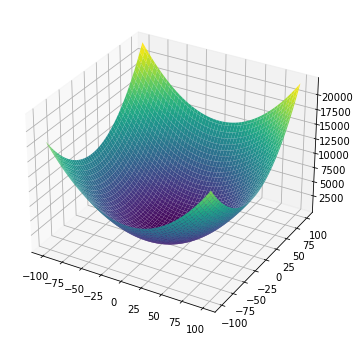

In [19]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
plt.show()

In [37]:
class GradientDescent:
    def __init__(self, n_dim, learning_rate=0.01, minimize=True, iterations=1000):
        self.n_dim = n_dim
        self.learning_rate = learning_rate
        self.minimize = minimize
        self.iterations = iterations
        
        self.params = np.random.rand(n_dim) * 100
    
    @staticmethod
    def function(X, Y):
        return (X - 0.3)**2 + (Y + 11)**2 + 3
        
    @staticmethod
    def gradient(x, y):
        return np.array([2 * (x-0.3), 2 * (y+11)])
    
    def run(self):
        history = []
        for _ in range(self.iterations):
            history.append((self.params[0], self.params[1],
                            self.function(*self.params)))            
            if self.minimize:
                self.params -= self.learning_rate * self.gradient(*self.params)
            else:
                self.params += self.learning_rate * self.gradient(*self.params)
            
        return np.array(history)

In [38]:
gd = GradientDescent(2)
history = gd.run()

In [39]:
history

array([[   92.733 ,    77.7409, 16421.8077],
       [   90.8844,    75.9661, 15771.6229],
       [   89.0727,    74.2267, 15147.1854],
       ...,
       [    0.3   ,   -11.    ,     3.    ],
       [    0.3   ,   -11.    ,     3.    ],
       [    0.3   ,   -11.    ,     3.    ]])